In [380]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import and load Dataset

In [381]:
df_train = pd.read_csv(r'C:\Users\apopalzi\Documents\git\apf\datasets\Loan_Data\loan-train.csv')

In [382]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [383]:
df_test = pd.read_csv(r'C:\Users\apopalzi\Documents\git\apf\datasets\Loan_Data\loan-test.csv')

In [384]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


# EDA and Data Preprocessing

In [385]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [386]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [387]:
df_train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [388]:
for item in df_train.columns:
    if df_train[item].isna().sum()>0:
        missing_vals = df_train[item].isna().sum()
        print(f'{item} is missing {missing_vals/614*100} % of total values')
        print('')

Gender is missing 2.1172638436482085 % of total values

Married is missing 0.4885993485342019 % of total values

Dependents is missing 2.44299674267101 % of total values

Self_Employed is missing 5.211726384364821 % of total values

LoanAmount is missing 3.5830618892508146 % of total values

Loan_Amount_Term is missing 2.2801302931596092 % of total values

Credit_History is missing 8.143322475570033 % of total values



In [389]:
for item in df_test.columns:
    if df_test[item].isna().sum()>0:
        missing_vals = df_test[item].isna().sum()
        print(f'{item} is missing {missing_vals/614*100} % of total values')
        print('')

Gender is missing 1.7915309446254073 % of total values

Dependents is missing 1.6286644951140066 % of total values

Self_Employed is missing 3.7459283387622153 % of total values

LoanAmount is missing 0.8143322475570033 % of total values

Loan_Amount_Term is missing 0.9771986970684038 % of total values

Credit_History is missing 4.723127035830619 % of total values



<AxesSubplot:xlabel='Property_Area'>

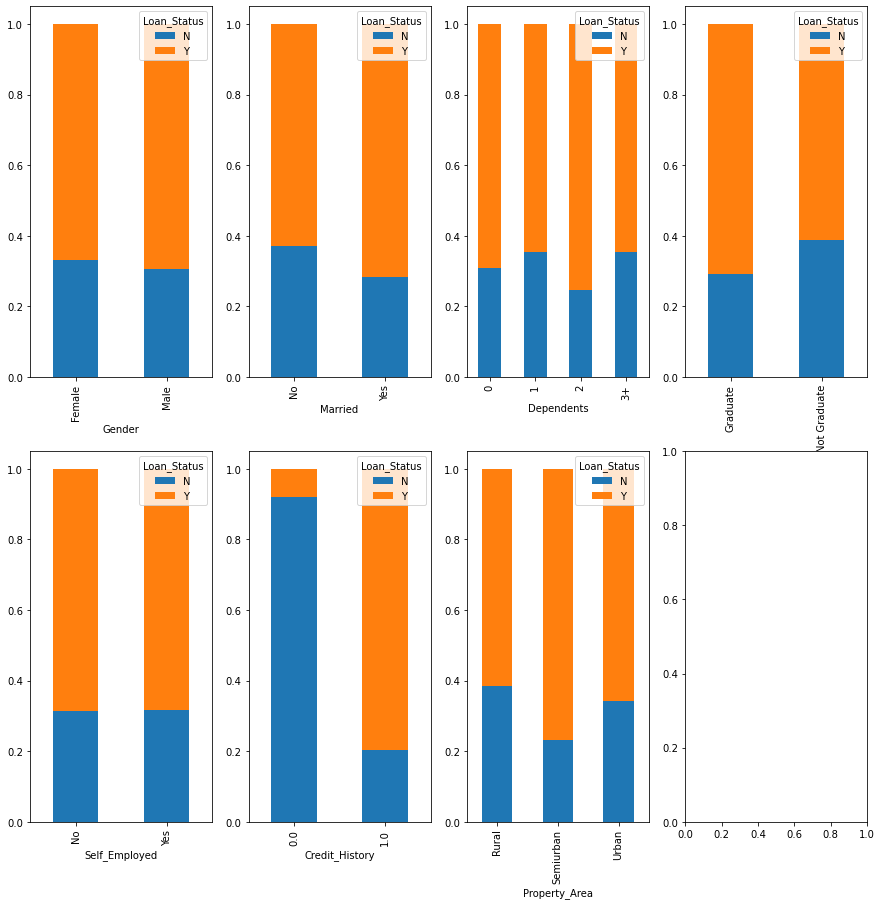

In [390]:
fig, ax = plt.subplots(2,4,figsize = (15,15))
Gender = pd.crosstab(df_train['Gender'],df_train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=ax[0,0])

Married = pd.crosstab(df_train['Married'],df_train['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, ax=ax[0,1])

Dependents = pd.crosstab(df_train['Dependents'],df_train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, ax=ax[0,2])

Education = pd.crosstab(df_train['Education'],df_train['Loan_Status'])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=ax[0,3])

Self_Employed = pd.crosstab(df_train['Self_Employed'],df_train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, ax=ax[1,0])

Credit_History = pd.crosstab(df_train['Credit_History'],df_train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, ax=ax[1,1])

Property_Area = pd.crosstab(df_train['Property_Area'],df_train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=ax[1,2])

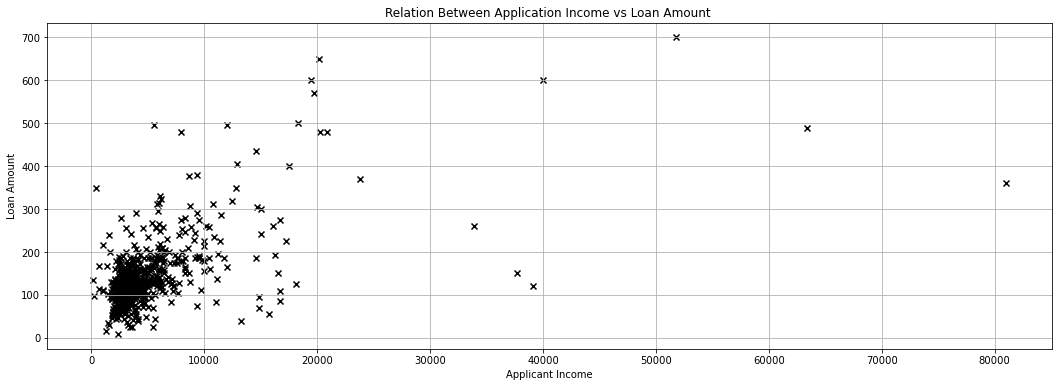

In [391]:
plt.figure(figsize=(18, 6))
plt.title("Relation Between Application Income vs Loan Amount ")

plt.grid()
plt.scatter(df_train['ApplicantIncome'] , df_train['LoanAmount'], c='k', marker='x')
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

### Fill missing values

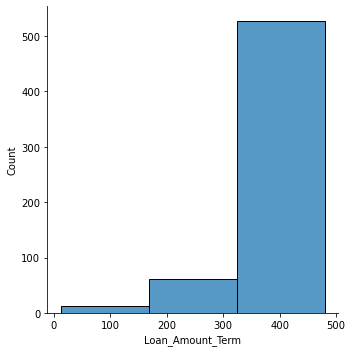

In [392]:
sns.displot(data = df_train.Loan_Amount_Term,bins = 3)

In [393]:
df_train['Credit_History'].fillna(df_train['Credit_History'].mode()[0], inplace=True)
df_test['Credit_History'].fillna(df_test['Credit_History'].mode()[0], inplace=True) 

df_train['LoanAmount'].fillna(df_train['LoanAmount'].median(), inplace=True) 
df_test['LoanAmount'].fillna(df_test['LoanAmount'].median(), inplace=True) 

df_train['Gender'].fillna(df_train['Gender'].mode()[0], inplace=True)
df_test['Gender'].fillna(df_test['Gender'].mode()[0], inplace=True)

df_train['Dependents'].fillna(df_train['Dependents'].mode()[0], inplace=True)
df_test['Dependents'].fillna(df_test['Dependents'].mode()[0], inplace=True)

df_train['Married'].fillna(df_train['Married'].mode()[0], inplace=True)
df_test['Married'].fillna(df_test['Married'].mode()[0], inplace=True)

df_train['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0], inplace=True)
df_test['Self_Employed'].fillna(df_test['Self_Employed'].mode()[0], inplace=True)

df_train['Credit_History'].fillna(df_train['Credit_History'].mode()[0], inplace=True)
df_test['Credit_History'].fillna(df_test['Credit_History'].mode()[0], inplace=True)

df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].median(), inplace=True)
df_test['Loan_Amount_Term'].fillna(df_test['Loan_Amount_Term'].median(), inplace=True)

In [394]:
df_train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [395]:
df_test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

### Convert Categorical Variables

In [396]:
df_train_temp = df_train.copy()
for item in df_train_temp.columns:
    if pd.api.types.is_string_dtype(df_train_temp[item]):
        df_train_temp.drop(item, axis = 1, inplace = True)

In [397]:
df_train_temp.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,128.0,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


In [398]:
cat = df_train.copy()
for item in cat.columns:
    if pd.api.types.is_numeric_dtype(cat[item]):
        cat.drop(item, axis = 1, inplace = True)

In [399]:
cat.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [400]:
cat.drop('Loan_ID',axis = 1, inplace = True)


In [401]:
cat.drop('Dependents',axis = 1, inplace = True)

In [402]:
dummies = pd.get_dummies(cat,drop_first = True)

In [403]:
dummies

,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,1,0,0,0,0,1,1
1,1,1,0,0,0,0,0
2,1,1,0,1,0,1,1
3,1,1,1,0,0,1,1
4,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,1
610,1,1,0,0,0,0,1
611,1,1,0,0,0,1,1
612,1,1,0,0,0,1,1


In [404]:
df_train_temp = df_train_temp.join(dummies)

In [405]:
df_train_temp

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,0,0,0,0,0,0,1
610,4106,0.0,40.0,180.0,1.0,1,1,0,0,0,0,1
611,8072,240.0,253.0,360.0,1.0,1,1,0,0,0,1,1
612,7583,0.0,187.0,360.0,1.0,1,1,0,0,0,1,1


The Dependents columns needs to be processed separately since it is nominal and OHE would not be the best approach.

In [406]:
nominal_data = df_train.copy()

In [407]:
nominal_data.Dependents.value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [408]:
order = ['0','1','2','3+']

In [409]:
from sklearn.preprocessing import OrdinalEncoder

In [410]:
ordi = OrdinalEncoder(categories = [order])

In [411]:
ordi.fit(nominal_data[['Dependents']])

OrdinalEncoder(categories=[['0', '1', '2', '3+']])

In [412]:
encoded_data = pd.DataFrame(ordi.transform(nominal_data[['Dependents']]))

Join data with main dataframe

In [413]:
df_train_temp['Dependents'] = encoded_data

In [414]:
df_train_temp

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,Dependents
0,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,1,1,0.0
1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0,1.0
2,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1,1,0.0
3,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1,1,0.0
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,0,0,0,0,0,0,1,0.0
610,4106,0.0,40.0,180.0,1.0,1,1,0,0,0,0,1,3.0
611,8072,240.0,253.0,360.0,1.0,1,1,0,0,0,1,1,1.0
612,7583,0.0,187.0,360.0,1.0,1,1,0,0,0,1,1,2.0


### Balance target class

In [415]:
main_df = df_train_temp.copy()

In [416]:
X = main_df.drop('Loan_Status_Y',axis = 1)
y = main_df.Loan_Status_Y

In [417]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X,y = smote.fit_resample(X,y)

In [418]:
y.value_counts()

1    422
0    422
Name: Loan_Status_Y, dtype: int64

In [419]:
oversampled_df = X.copy()

In [420]:
oversampled_df['Loan_Status'] = y

In [421]:
oversampled_df.Loan_Status.value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

In [422]:
oversampled_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Dependents,Loan_Status
0,5849,0.000000,128.000000,360.000000,1.000000,1,0,0,0,0,1,0.000000,1
1,4583,1508.000000,128.000000,360.000000,1.000000,1,1,0,0,0,0,1.000000,0
2,3000,0.000000,66.000000,360.000000,1.000000,1,1,0,1,0,1,0.000000,1
3,2583,2358.000000,120.000000,360.000000,1.000000,1,1,1,0,0,1,0.000000,1
4,6000,0.000000,141.000000,360.000000,1.000000,1,0,0,0,0,1,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,3715,4544.819094,133.614782,228.443472,0.269130,1,1,0,0,0,0,0.269130,0
840,3432,0.000000,135.129749,360.000000,0.950513,0,0,0,0,0,0,2.000000,0
841,8742,4235.910315,313.742526,360.000000,0.915551,1,0,0,0,0,0,0.084449,0
842,4607,2031.333408,168.722004,360.000000,1.000000,1,0,0,0,0,0,0.000000,0


<AxesSubplot:>

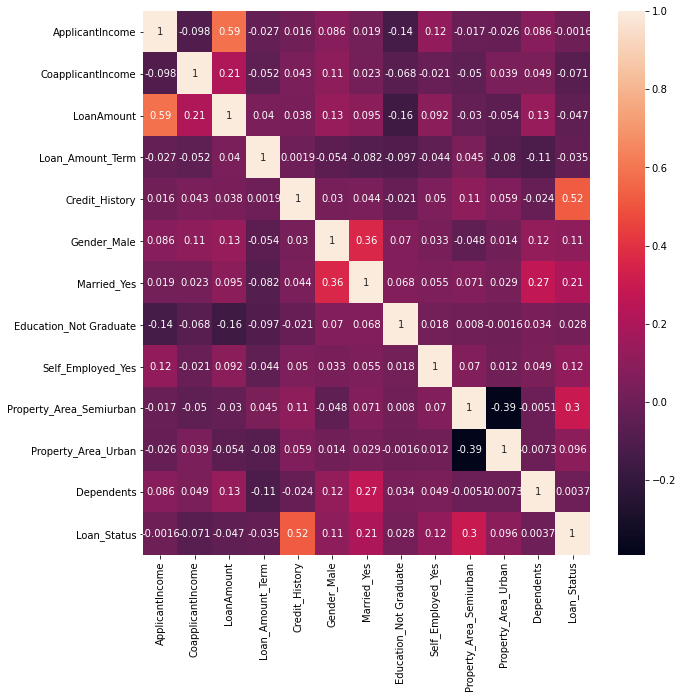

In [423]:
fig,ax = plt.subplots(figsize = (10,10))
sns.heatmap(oversampled_df.corr(),annot = True)

# Modelling - Decision Tree

In [424]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [425]:
cv = KFold(n_splits=7, random_state=1, shuffle=True)
model = DecisionTreeClassifier()

accuracy = cross_val_score(model, X, y, scoring='accuracy',
                         cv=cv, n_jobs=-1)

recall = cross_val_score(model, X, y, scoring='recall',
                         cv=cv, n_jobs=-1)

precision =  cross_val_score(model, X, y, scoring='precision',
                         cv=cv, n_jobs=-1)

In [426]:
print('----------Baseline Model----------------------')
print('')
print(f'the accuracy of the model is :{accuracy.mean()*100}%')
print(f'the recall score of the model is :{recall.mean()*100}%')
print(f'the precision score of the model is :{precision.mean()*100}%')

----------Baseline Model----------------------

the accuracy of the model is :77.84336875245967%
the recall score of the model is :77.83705442843168%
the precision score of the model is :77.03801745252711%


## Hyperparameter tuning - Decision Tree

create independent test set to test our model after tuning

In [427]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y,test_size = 0.1,stratify = y,random_state = 100)


param_dict = {'criterion':['gini','entropy'],
             'max_depth':range(1,10),
              'min_samples_split':range(3,10),
             'min_samples_leaf':range(1,5)}

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(model,
                    param_grid = param_dict,
                   cv = 7,
                   verbose = 2,
                   n_jobs = -1,
                   scoring = 'f1')

grid.fit(X_train1,y_train1)

grid.best_params_

grid.best_score_

### Final Decision Tree Model

In [428]:
from sklearn.metrics import recall_score,precision_score,accuracy_score,classification_report


model_2 = DecisionTreeClassifier(criterion = 'gini',
 max_depth=7,
 min_samples_leaf= 1,
 min_samples_split= 4)

model_2.fit(X_train1,y_train1)
y_pred1 = model_2.predict(X_test1)

accuracy_1 = accuracy_score(y_test1,y_pred1)
recall_1 = recall_score(y_test1,y_pred1)
precision_1 = precision_score(y_test1,y_pred1)

In [429]:
print('          Decision Tree             ')
print(f'accuracy score: {accuracy_1*100} %')
print(f'recall score: {recall_1*100} %')
print(f'precision score: {precision_1*100} %')
print('----------------------')

print(classification_report(y_test1,y_pred1))

          Decision Tree             
accuracy score: 76.47058823529412 %
recall score: 97.61904761904762 %
precision score: 68.33333333333333 %
----------------------
              precision    recall  f1-score   support

           0       0.96      0.56      0.71        43
           1       0.68      0.98      0.80        42

    accuracy                           0.76        85
   macro avg       0.82      0.77      0.75        85
weighted avg       0.82      0.76      0.75        85



# Modelling - Gradient Boost

In [430]:
from sklearn.ensemble import GradientBoostingClassifier

model_3 = GradientBoostingClassifier()


cv = KFold(n_splits=7, random_state=3, shuffle=True)

accuracy_2 = cross_val_score(model_3, X_train1, y_train1, scoring='accuracy',
                         cv=cv, n_jobs=-1)


recall_2 = cross_val_score(model_3, X_train1, y_train1, scoring='recall',
                         cv=cv, n_jobs=-1)


precision_2 =  cross_val_score(model_3, X_train1, y_train1, scoring='precision',
                         cv=cv, n_jobs=-1)


print('   GBoosting     ')
print('-------------------')
print(f'the accuracy of the model is :{accuracy_2.mean()*100}%')
print(f'the recall score of the model is :{recall_2.mean()*100}%')
print(f'the precision score of the model is :{precision_2.mean()*100}%')

   GBoosting     
-------------------
the accuracy of the model is :80.51308188922867%
the recall score of the model is :88.7584971344074%
the precision score of the model is :76.0943284867465%


## Hyperparameter tuning - Gradient Boosting

parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100],
    'min_weight_fraction_leaf':[0.0,0.1,0.2,0.3,0.4,0.5],
    }

grid_2 = GridSearchCV(model_3,
                    param_grid = parameters,
                   cv = 7,
                   verbose = 2,
                   n_jobs = -1,
                   scoring = 'f1')

grid_2.fit(X_train1,y_train1)

grid_2.best_params_

grid_2.best_score_

## Final Gradient Boosting Model

In [431]:
model_4 = GradientBoostingClassifier(learning_rate= 1, max_depth= 9, n_estimators= 500,min_weight_fraction_leaf = 0.0)

model_4.fit(X_train1,y_train1)
y_pred2 = model_4.predict(X_test1)

accuracy_3 = accuracy_score(y_test1,y_pred2)
recall_3 = recall_score(y_test1,y_pred2)
precision_3 = precision_score(y_test1,y_pred2)
print('          GBOOST        ')
print('----------------')
print(f'the accuracy of the model is :{accuracy_3.mean()*100}%')
print(f'the recall score of the model is :{recall_3.mean()*100}%')
print(f'the precision score of the model is :{precision_3.mean()*100}%')

          GBOOST        
----------------
the accuracy of the model is :76.47058823529412%
the recall score of the model is :83.33333333333334%
the precision score of the model is :72.91666666666666%


# Modelling - XGBoosting

In [432]:
import xgboost as xgb

In [433]:
model_5 = xgb.XGBClassifier()

In [434]:
cv = KFold(n_splits=7, random_state=5, shuffle=True)

accuracy_4 = cross_val_score(model_5, X_train1, y_train1, scoring='accuracy',
                         cv=cv, n_jobs=-1)


recall_4 = cross_val_score(model_5, X_train1, y_train1, scoring='recall',
                         cv=cv, n_jobs=-1)


precision_4 =  cross_val_score(model_5, X_train1, y_train1, scoring='precision',
                         cv=cv, n_jobs=-1)


print('   XBG     ')
print('-------------------')
print(f'the accuracy of the model is :{accuracy_4.mean()*100}%')
print(f'the recall score of the model is :{recall_4.mean()*100}%')
print(f'the precision score of the model is :{precision_4.mean()*100}%')

   XBG     
-------------------
the accuracy of the model is :83.65249259744672%
the recall score of the model is :86.68871351446269%
the precision score of the model is :82.1580845157756%


## Hyperparameter tuning - XGboosting

parameters_2 = {
    'booster':['gbtree','gblinear','dart'],
    'eta':[0.01,0.015,0.025,0.05,0.1],
    'Gamma':[0.1,0.3,0.5,0.7,0.9],
    'Max_depth':[3,5,7,9,11,12,15,17,25],
    'Min_child_weight':[1,3,5,7]}

grid_3 = GridSearchCV(model_5,
                    param_grid = parameters_2,
                   cv = 7,
                   verbose = 2,
                   n_jobs = -1,
                   scoring = 'f1')

grid_3.fit(X_train1,y_train1)

grid_3.best_params_

grid_3.best_score_

## Final XGB Model

In [435]:
model_6 = xgb.XGBClassifier(Gamma= 0.1,
 Max_depth= 3,
 Min_child_weight= 1,
 booster= 'gbtree',
 eta= 0.05)

model_6.fit(X_train1,y_train1)
y_pred3 = model_6.predict(X_test1)

accuracy_5 = accuracy_score(y_test1,y_pred3)
recall_5 = recall_score(y_test1,y_pred3)
precision_5 = precision_score(y_test1,y_pred3)

print('            XGB           ')
print('-------------------------')
print(f'the accuracy of the model is :{accuracy_5*100}%')
print(f'the recall score of the model is :{recall_5*100}%')
print(f'the precision score of the model is :{precision_5*100}%')

[10:40:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Gamma", "Max_depth", "Min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


            XGB           
-------------------------
the accuracy of the model is :77.64705882352942%
the recall score of the model is :90.47619047619048%
the precision score of the model is :71.69811320754717%


# Modelling - Random Forest

In [436]:
from sklearn.ensemble import RandomForestClassifier

model_7 = RandomForestClassifier()

cv = KFold(n_splits=7, random_state=7, shuffle=True)

accuracy_6 = cross_val_score(model_7, X_train1, y_train1, scoring='accuracy',
                         cv=cv, n_jobs=-1)

recall_6 = cross_val_score(model_7, X_train1, y_train1, scoring='recall',
                         cv=cv, n_jobs=-1)


precision_6 =  cross_val_score(model_7, X_train1, y_train1, scoring='precision',
                         cv=cv, n_jobs=-1)
print('                 RF           ')
print('---------------------')
print(f'the accuracy of the model is :{accuracy_6.mean()*100}%')
print(f'the recall score of the model is :{recall_6.mean()*100}%')
print(f'the precision score of the model is :{precision_6.mean()*100}%')

                 RF           
---------------------
the accuracy of the model is :83.2787243337702%
the recall score of the model is :88.07266169890863%
the precision score of the model is :80.02676241201658%


## Hyperparameter tuning - Random Forest

parameters_3 = n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
#Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]




random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

grid_4 = GridSearchCV(model_7,
                    param_grid = random_grid,
                   cv = 7,
                   verbose = 2,
                   n_jobs = -1,
                   scoring = 'f1')

grid_4.fit(X_train1,y_train1)

grid_4.best_params_

grid_4.best_score_

## Random Forest - Final Model 

In [437]:
model_8 = RandomForestClassifier(bootstrap= True,
 max_depth= 20,
 max_features= 'auto',
 min_samples_leaf= 2,
 min_samples_split= 2,
 n_estimators= 1800)

model_8.fit(X_train1,y_train1)
y_pred4 = model_8.predict(X_test1)

accuracy_7 = accuracy_score(y_test1,y_pred4)
recall_7 = recall_score(y_test1,y_pred4)
precision_7 = precision_score(y_test1,y_pred4)

print('            RF           ')
print('-------------------------')
print(f'the accuracy of the model is :{accuracy_7*100}%')
print(f'the recall score of the model is :{recall_7*100}%')
print(f'the precision score of the model is :{precision_7*100}%')

C:\Users\apopalzi\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


            RF           
-------------------------
the accuracy of the model is :82.35294117647058%
the recall score of the model is :92.85714285714286%
the precision score of the model is :76.47058823529412%


# Voting Classifier

In [438]:
## ensemble learing
#load packages
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV


estimator = []

estimator.append(('dt', DecisionTreeClassifier(criterion = 'gini',
max_depth=7,min_samples_leaf= 1,
 min_samples_split= 4)))

In [439]:
estimator.append(('Gboost',GradientBoostingClassifier(learning_rate= 1, max_depth=9, n_estimators= 500,min_weight_fraction_leaf = 0.0)))
estimator.append(('xgb',xgb.XGBClassifier(Gamma= 0.1,
 Max_depth= 3,
 Min_child_weight= 1,
 booster= 'gbtree',
 eta= 0.05)))

In [440]:
estimator.append(('RF',RandomForestClassifier(bootstrap= True,
 max_depth= 20,
 max_features= 'auto',
 min_samples_leaf= 2,
 min_samples_split= 2,
 n_estimators= 1800)))

In [441]:
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(X_train1, y_train1)
y_pred5 = vot_hard.predict(X_test1)


[10:40:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Gamma", "Max_depth", "Min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\apopalzi\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [442]:
accuracy_8 = accuracy_score(y_test1,y_pred5)
recall_8 = recall_score(y_test1,y_pred5)
precision_8 = precision_score(y_test1,y_pred5)

print('            Voting CLF           ')
print('-------------------------')
print(f'the accuracy of the model is :{accuracy_8*100}%')
print(f'the recall score of the model is :{recall_8*100}%')
print(f'the precision score of the model is :{precision_8*100}%')

            Voting CLF           
-------------------------
the accuracy of the model is :83.52941176470588%
the recall score of the model is :90.47619047619048%
the precision score of the model is :79.16666666666666%


# Best Features